# Linear Regression with iPython Notebook

In [1]:
import torch
from matplotlib import pyplot as plt

## Create the Data

In [2]:
n_samples = 1000
weights, bias = torch.rand(1), 0.3
X = torch.randn(n_samples, 1)
noise = torch.randn(n_samples) * 0.15
Y = X@weights + bias + noise

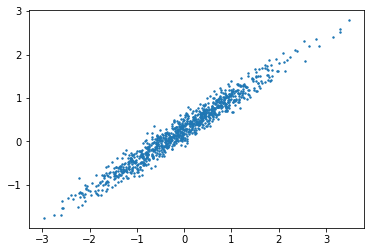

In [3]:
plt.scatter(X, Y, s=2)

## Find a Line which matches these values

In [4]:
pred_weights, pred_bias = torch.ones(1), torch.tensor(0.0)
pred_y = X*pred_weights + pred_bias

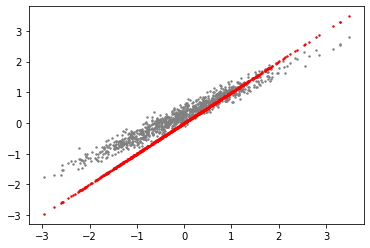

In [5]:
plt.scatter(X, Y, s=2, c="gray")
plt.scatter(X, pred_y, c="red", s=2)

So, our goal is to find a `weights` and `bias` values which minimize the loss.

## Loss

Loss is a single value for the difference between the actual & the prediction. Let's use a something called, mean squared error.

In [6]:
def mse_loss(Y, y_pred):
    return ((Y-y_pred)**2).mean()

mse_loss(Y, pred_y)

tensor(1.5807)

## Gradient Descent

We can use the SGD loop to find it.

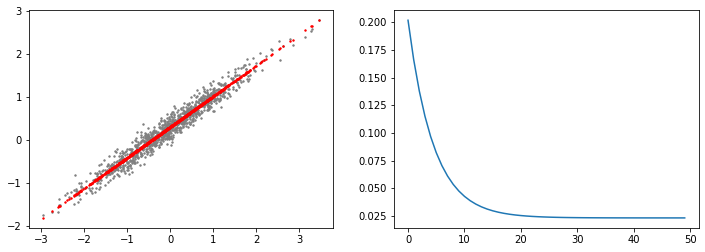

In [7]:
pred_weights.requires_grad_()
pred_bias.requires_grad_()

lr = 0.05

losses = []

for i in range(50):
    if pred_weights.grad is not None:
      pred_weights.grad.zero_()
      pred_bias.grad.zero_()

    pred_y = X@pred_weights + pred_bias
    loss = mse_loss(Y, pred_y)
    loss.backward()

    losses.append(loss.item())

    with torch.no_grad():
      pred_weights -= pred_weights.grad * lr
      pred_bias -= pred_bias.grad * lr

_, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].scatter(X, Y, s=2, c="gray")
ax[0].scatter(X, pred_y.detach().cpu(), c="red", s=2)

ax[1].plot(losses)

## Train & Validation Set

In [8]:
n_split_point = int(len(X) * 0.8)
train_x = X[0:n_split_point]
train_y = Y[0:n_split_point]
valid_x = X[n_split_point:]
valid_y = Y[n_split_point:]

### Let's run the gradient descent again

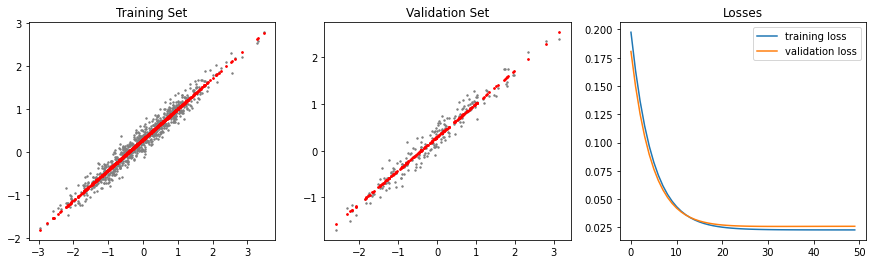

In [9]:
pred_weights, pred_bias = torch.ones(1), torch.tensor(0.0)
pred_weights.requires_grad_()
pred_bias.requires_grad_()

lr = 0.05

epochs = 50
train_losses = []
valid_losses = []

for epoch in range(epochs):
    if pred_weights.grad is not None:
        pred_weights.grad.zero_()
        pred_bias.grad.zero_()
        
    yhat = train_x@pred_weights + pred_bias
    train_loss = mse_loss(yhat, train_y)
    train_loss.backward()
    train_losses.append(train_loss.item())
    
    with torch.no_grad():
        pred_weights -= pred_weights.grad * lr
        pred_bias -= pred_bias.grad * lr
        
        yhat_valid = valid_x@pred_weights + pred_bias
        valid_loss = mse_loss(yhat_valid, valid_y)
        valid_losses.append(valid_loss.item())
        

_, ax = plt.subplots(1, 3, figsize=(15, 4))

ax[0].scatter(train_x, train_y, c="gray", s=2)
ax[0].scatter(train_x, yhat.detach().cpu(), c="red", s=3)
ax[0].set_title("Training Set")

ax[1].scatter(valid_x, valid_y, c="gray", s=2)
ax[1].scatter(valid_x, yhat_valid.detach().cpu(), c="red", s=3)
ax[1].set_title("Validation Set")

ax[2].plot(train_losses, label="training loss")
ax[2].plot(valid_losses, label="validation loss")
ax[2].set_title("Losses")
ax[2].legend()

## Let's Do SGD

In [10]:
def make_splits(xlist, ylist, chunk_size=16):
    n_total = len(xlist)
    start = 0
    
    chunks = []
    while start < n_total:
        end = min(start + chunk_size, n_total)
        chunks.append((xlist[start:end], ylist[start:end]))
        start = end
    
    return chunks

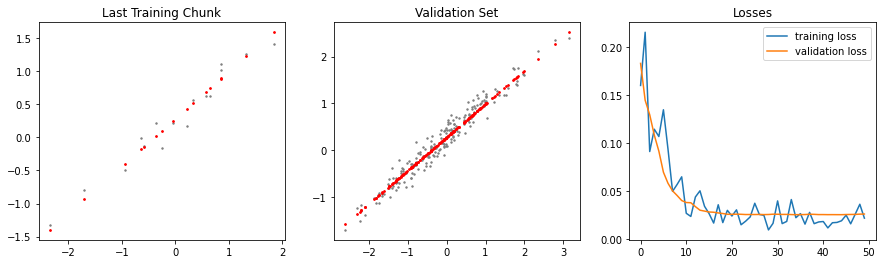

In [11]:
pred_weights, pred_bias = torch.ones(1), torch.tensor(0.0)
pred_weights.requires_grad_()
pred_bias.requires_grad_()

lr = 0.05

epochs = 1
train_losses = []
valid_losses = []

for epoch in range(epochs):
    chunks = make_splits(train_x, train_y, 16)
    for xlist, ylist in chunks:
        if pred_weights.grad is not None:
            pred_weights.grad.zero_()
            pred_bias.grad.zero_()

        yhat = xlist@pred_weights + pred_bias
        train_loss = mse_loss(yhat, ylist)
        train_loss.backward()
        train_losses.append(train_loss.item())

        with torch.no_grad():
            pred_weights -= pred_weights.grad * lr
            pred_bias -= pred_bias.grad * lr

            yhat_valid = valid_x@pred_weights + pred_bias
            valid_loss = mse_loss(yhat_valid, valid_y)
            valid_losses.append(valid_loss.item())
        

_, ax = plt.subplots(1, 3, figsize=(15, 4))

ax[0].scatter(xlist, ylist, c="gray", s=2)
ax[0].scatter(xlist, yhat.detach().cpu(), c="red", s=3)
ax[0].set_title("Last Training Chunk")

ax[1].scatter(valid_x, valid_y, c="gray", s=2)
ax[1].scatter(valid_x, yhat_valid.detach().cpu(), c="red", s=3)
ax[1].set_title("Validation Set")

ax[2].plot(train_losses, label="training loss")
ax[2].plot(valid_losses, label="validation loss")
ax[2].set_title("Losses")
ax[2].legend()

**Wigh SGD, we can acheive this just using a single batch, that's because of the use of chunks**

## Using More than a Single Parameter

In our linear model, we had only a single parameter like below:

```
y = mx + bias
```

But now we are going to have multiple values.

Because of this, we won't be able to show the results in a graph. But we will look at losses.

In [12]:
n_parameters = 500
n_samples = 300
X = torch.randn(n_samples, n_parameters)
noise = torch.randn(n_samples) * 0.1
Y = X@torch.rand(n_parameters) + 0.3 + noise

In [13]:
# Train/Valid sets
n_split_point = int(n_samples * 0.8)
train_x, train_y = X[0:n_split_point], Y[0:n_split_point]
valid_x, valid_y = X[n_split_point:], Y[n_split_point:]

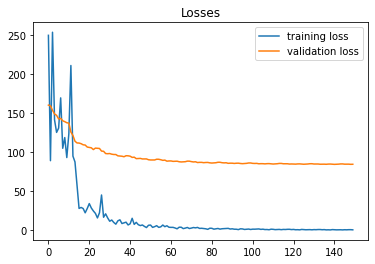

In [14]:
# SGD Loop
pred_weights, pred_bias = torch.ones(n_parameters), torch.tensor(0.0)
pred_weights.requires_grad_()
pred_bias.requires_grad_()

lr = 0.01

epochs = 10
train_losses = []
valid_losses = []

for epoch in range(epochs):
    chunks = make_splits(train_x, train_y, 16)
    for xlist, ylist in chunks:
        if pred_weights.grad is not None:
            pred_weights.grad.zero_()
            pred_bias.grad.zero_()

        yhat = xlist@pred_weights + pred_bias
        train_loss = mse_loss(yhat, ylist)
        train_loss.backward()
        train_losses.append(train_loss.item())

        with torch.no_grad():
            pred_weights -= pred_weights.grad * lr
            pred_bias -= pred_bias.grad * lr

            yhat_valid = valid_x@pred_weights + pred_bias
            valid_loss = mse_loss(yhat_valid, valid_y)
            valid_losses.append(valid_loss.item())

plt.plot(train_losses, label="training loss")
plt.plot(valid_losses, label="validation loss")
plt.title("Losses")
plt.legend()

As you can see, with large amount of parameters, validation loss can be higher than the training loss. 

**So, this is overfitting**

## Let's Use Regularization / Weight Decay

With Regularization, we can try to reduce the overfitting by limiting the values our weights can go.

In [15]:
def l2_penalty(weights):
    return (weights ** 2).sum() / 2

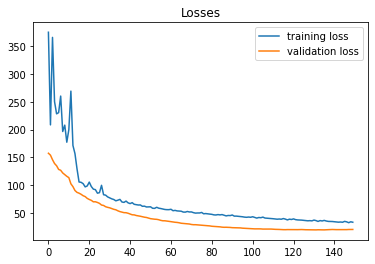

In [23]:
# SGD Loop
pred_weights, pred_bias = torch.ones(n_parameters), torch.tensor(0.0)
pred_weights.requires_grad_()
pred_bias.requires_grad_()

lr = 0.01
wd = 0.5

epochs = 10
train_losses = []
valid_losses = []

for epoch in range(epochs):
    chunks = make_splits(train_x, train_y, 16)
    for xlist, ylist in chunks:
        if pred_weights.grad is not None:
            pred_weights.grad.zero_()
            pred_bias.grad.zero_()

        yhat = xlist@pred_weights + pred_bias
        train_loss = mse_loss(yhat, ylist) + l2_penalty(pred_weights) * wd
        train_loss.backward()
        train_losses.append(train_loss.item())

        with torch.no_grad():
            pred_weights -= pred_weights.grad * lr
            pred_bias -= pred_bias.grad * lr

            yhat_valid = valid_x@pred_weights + pred_bias
            valid_loss = mse_loss(yhat_valid, valid_y)
            valid_losses.append(valid_loss.item())

plt.plot(train_losses, label="training loss")
plt.plot(valid_losses, label="validation loss")
plt.title("Losses")
plt.legend()

**See. As we added the weight decay, this starting to get better.**

Let's plot multiple values for weight decay.

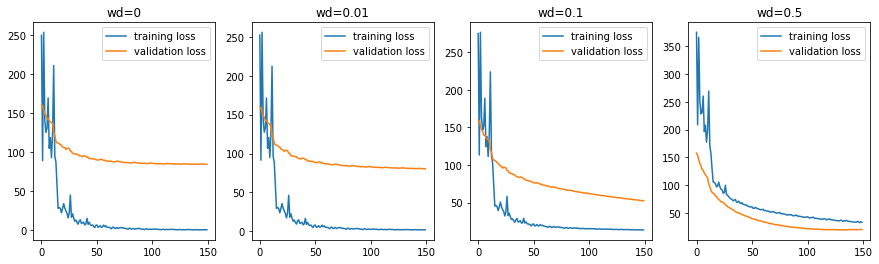

In [27]:
wd_values = [0, 0.01, 0.1, 0.5]
_, ax = plt.subplots(1, len(wd_values), figsize=(15, 4))
lr = 0.01

for i in range(len(wd_values)):
    wd = wd_values[i]
    # SGD Loop
    pred_weights, pred_bias = torch.ones(n_parameters), torch.tensor(0.0)
    pred_weights.requires_grad_()
    pred_bias.requires_grad_()

    epochs = 10
    train_losses = []
    valid_losses = []

    for epoch in range(epochs):
        chunks = make_splits(train_x, train_y, 16)
        for xlist, ylist in chunks:
            if pred_weights.grad is not None:
                pred_weights.grad.zero_()
                pred_bias.grad.zero_()

            yhat = xlist@pred_weights + pred_bias
            train_loss = mse_loss(yhat, ylist) + l2_penalty(pred_weights) * wd
            train_loss.backward()
            train_losses.append(train_loss.item())

            with torch.no_grad():
                pred_weights -= pred_weights.grad * lr
                pred_bias -= pred_bias.grad * lr

                yhat_valid = valid_x@pred_weights + pred_bias
                valid_loss = mse_loss(yhat_valid, valid_y)
                valid_losses.append(valid_loss.item())

    ax[i].plot(train_losses, label="training loss")
    ax[i].plot(valid_losses, label="validation loss")
    ax[i].set_title(f"wd={wd}")
    ax[i].legend()